In [1]:
#importing modules for the implementation
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl
from sklearn.feature_selection import SelectFromModel

In [2]:
#pulling the data from the pickled dataset 
nutrition = pd.read_csv("./Nutrition_Full_Features.csv")


In [3]:
#dropping NANSinclude a lot of NaNs
#nutrition.drop(nutrition.columns[1:3], axis=1, inplace=True)
nutrition = nutrition.dropna()
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,Dutch Apple Pie,Baked Foods,2.80,500.0,0.560000,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,Bread White Wheat,Baked Foods,0.95,800.0,0.118750,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,Bagels Wheat,Baked Foods,1.60,450.0,0.355556,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [4]:
#extracting the nutrition data, labelling X as this is the input to the SKlearn algorithm
X = nutrition.iloc[:,11:]

In [5]:
#extracting the greenhouse gas emissions 
y = nutrition.iloc[:,7:8]

In [6]:
#changing y to a 1d array rather than the table 
y = np.ravel(y)
y

array([0.1441, 0.1441, 0.1441, ..., 2.124 , 0.0455, 0.0455])

In [7]:
#splitting the dataset into a test and train data set, with 20% being used for testing
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.2) #size =0.2 means 80% data is training data, 20% testing


In [8]:
#splitting train data set into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.01)

In [24]:
#importing sklearn algorithm and using it with 2000 trees 
#storing the prediction from the test 
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
model = BaggingRegressor(n_estimators=3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
#evaluating the model by checking errors
#generally error decreases slightly as number of trees is increased, converges around 200 trees

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24834266347687414
Mean Squared Error: 0.4930341568912814
Root Mean Squared Error: 0.7021639102740053


In [21]:
#writing a for loop to pull out the error at varying n_estimators (otherwise known as the number of trees the algorithm is using)


mse = []
mae = []
rmse = []
        
for i in range(1,200,1):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Mean_Absolute_Error = metrics.mean_absolute_error(y_test, y_pred)
    Mean_Squared_Error = metrics.mean_squared_error(y_test, y_pred)
    Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
   
    mse.append(Mean_Squared_Error)
    rmse.append(Root_Mean_Squared_Error)
    mae.append(Mean_Absolute_Error)
    

<function matplotlib.pyplot.show(close=None, block=None)>

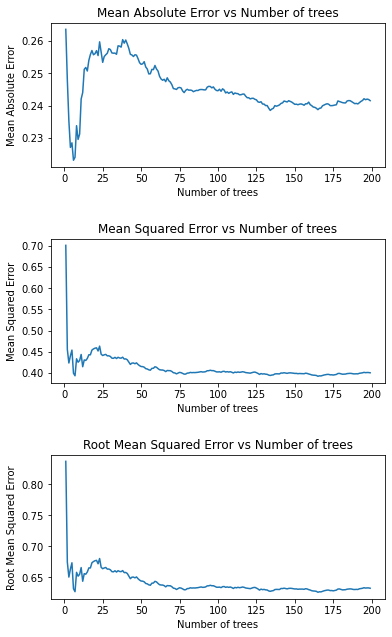

In [23]:
#creating a list of the number of estimators for ploting 
Number_estimators = list(range(1,200,1))


fig = plt.figure()
Absolute = plt.subplot(311)
Absolute.title.set_text('Mean Absolute Error vs Number of trees')
plt.plot(Number_estimators,mae)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of trees')
plt.show

Square = plt.subplot(312)
Square.title.set_text('Mean Squared Error vs Number of trees')
plt.plot(Number_estimators,mse)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of trees')
plt.show

Root = plt.subplot(313)
Root.title.set_text('Root Mean Squared Error vs Number of trees')
plt.plot(Number_estimators,rmse)
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Number of trees')
plt.subplots_adjust(top= 4, bottom=2, wspace=1, hspace=0.5)
plt.savefig('Error Plots')
plt.show

